In [1]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
# only get data analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

Text(0, 0.5, 'Number of Jobs')

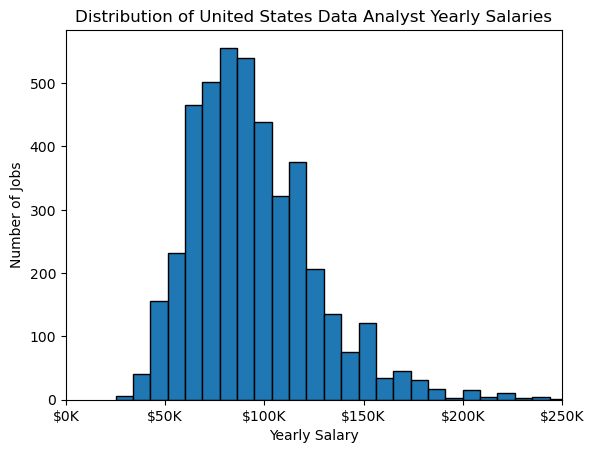

In [18]:
df_DA_US["salary_year_avg"].plot(kind="hist", bins=40, edgecolor="black")
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")

In [20]:
# dropping NaN values from the columns for plotting
df_DA_US = df_DA_US.dropna(subset="salary_year_avg")

<Axes: >

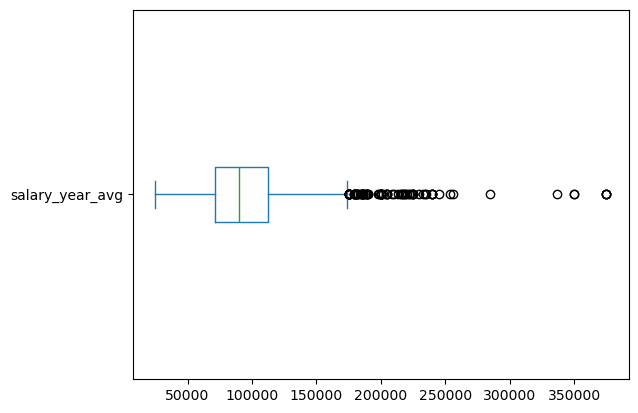

In [24]:
df_DA_US["salary_year_avg"].plot(kind="box", vert=False)

/var/folders/qd/m50ypw753dn6jbnnqhnzt9fw0000gn/T/ipykernel_69800/1295485785.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


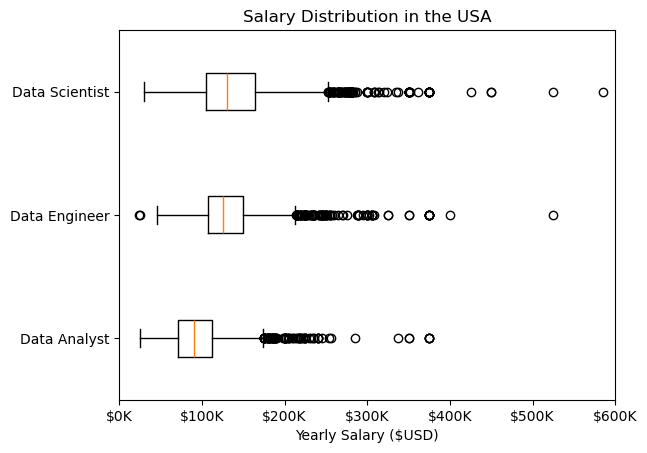

In [40]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()

df_US = df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles] # im not really understadning this

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the USA")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0,600000)
plt.show()

In [33]:
df_US["job_title_short"].value_counts()

job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]